# CSCI 416 - HW3

### Name:

# <font color='red'>Problem 3</font>


/Users/scotthanna/Desktop/Machine/HW3/example_svm.py:47: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap='Paired')



Script to Explore SVMs

Simple script to explore SVM training with varying C

Example adapted from scikit_learn documentation by Eric Eaton, 2014


Training the SVM

Testing the SVM
Figure(640x480)

Script to Explore SVMs

Simple script to explore SVM training with varying C

Example adapted from scikit_learn documentation by Eric Eaton, 2014


Training the SVM

Testing the SVM


/Users/scotthanna/Desktop/Machine/HW3/example_svm.py:47: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap='Paired')


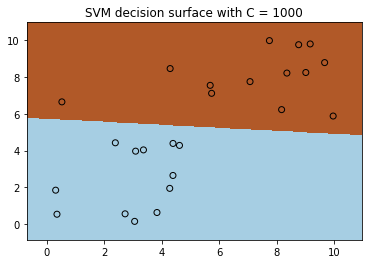

In [20]:
import os
script_path='example_svm.py'
os.system(f'python {script_path}')
%run example_svm.py

In [21]:
'''
Polynomial: As d increases the model becomes overfitting, which is not suprising as it is becoming more complicated. 
As C decreases the model starts to become a lot less accurate, but if C gets to large the model starts to become 
unnatural, to the point where the beige area is actually split by the brown area in the middle
'''

'''
Gaussian: As sigma increases the model becomes increasingly unnatural. for instance at 10000000000 the groups
become very circular in an effort to become more accurate. And at .00001 the entire model is just dark brown
because it doesn't care about correctness. Essentially a large sigma may cause overfitting. 
As C decreases the model becomes underfitting, but not nearly as quickly as it does when sigma decreases. 
As C increases the model becomes overfitting.
'''

"\nGaussian: As sigma increases the model becomes increasingly unnatural. for instance at 10000000000 the groups\nbecome very circular in an effort to become more accurate. And at .00001 the entire model is just dark brown\nbecause it doesn't care about correctness. Essentially a large sigma may cause overfitting. \nAs C decreases the model becomes underfitting, but not nearly as quickly as it does when sigma decreases. \nAs C increases the model becomes overfitting.\n"

In [248]:
"""
=====================================
Test SVM with custom Gaussian kernels
=====================================


Author: Eric Eaton, 2014

Adapted from scikit_learn documentation.

"""
print(__doc__)

from numpy import loadtxt, ones, zeros, where
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from svmKernels import myGaussianKernel
from svmKernels import _gaussSigma

# import some data to play with

filename = 'data/svmTuningData.dat'
data = loadtxt(filename, delimiter=',')
X_raw = data[:, 0:-1]
Y_raw = np.squeeze(np.array([data[:, 2]]).T)
m, d = X_raw.shape
#print(m,d)

print("Training the SVMs...")

trials = 2
folds = 10
fold_size = m//folds
train_size = fold_size * (folds - 1)
#print(fold_size, train_size)
validation_size = fold_size



# Best parameters
best=[0,0,0]

# Search parameters through a grid 
#TO DO: CHANGE THIS PART

sigma_vals = .7**np.arange(-7., 1.)
C_vals = np.linspace(.001,10, num=1000)

m,n=X_raw.shape
r=Y_raw.shape
print(m)
print(n)
print(r)



for c in range(0,100):
    for g in range(0,8):
        C = C_vals[c]
        _gaussSigma = sigma_vals[g]
        accuracy = 0
    
        for t  in range(0,trials):  
        
        #randomize the data set
            p = np.random.permutation(m)
            order = p[0:m]
            X = X_raw[order,:]
            Y = Y_raw[order]

            for f in range(0,folds):

                #cross validation: get train set and test set   
                # TO DO 
                # You need to finish the following for cross validation
                
            
                X_test = X[13*f:13*(f+1)]
                Y_test = Y[13*f:13*(f+1)]
                X_train = np.delete(X, slice(13*f,13*(f+1)), axis=0)
                Y_train = np.delete(Y, slice(13*f,13*(f+1)), axis=0)

                # create an instance of SVM with build in RBF kernel and train it
                equivalentGamma = 1.0 / (2 * _gaussSigma ** 2)
                model = svm.SVC(C=C, kernel='rbf', gamma=equivalentGamma)
                model.fit(X_train, Y_train)

                predictions_test = model.predict(np.c_[X_test[:,0],X_test[:,1]])
                a = np.mean(Y_test==predictions_test)
                accuracy += a

            
        # Best Accuracy So Far
        average_accuracy = accuracy/(folds*trials)
        if average_accuracy > best[2]:
            best[0] = C
            best[1] = _gaussSigma
            best[2] = average_accuracy
            

print(best)      


Test SVM with custom Gaussian kernels


Author: Eric Eaton, 2014

Adapted from scikit_learn documentation.


Training the SVMs...
130
2
(130,)
[0.8417567567567569, 2.0408163265306123, 0.9230769230769231]


The best parameters are:  [0.8417567567567569, 2.0408163265306123, 0.9230769230769231]


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_5396/2250466908.py:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, predictions, cmap="Paired")


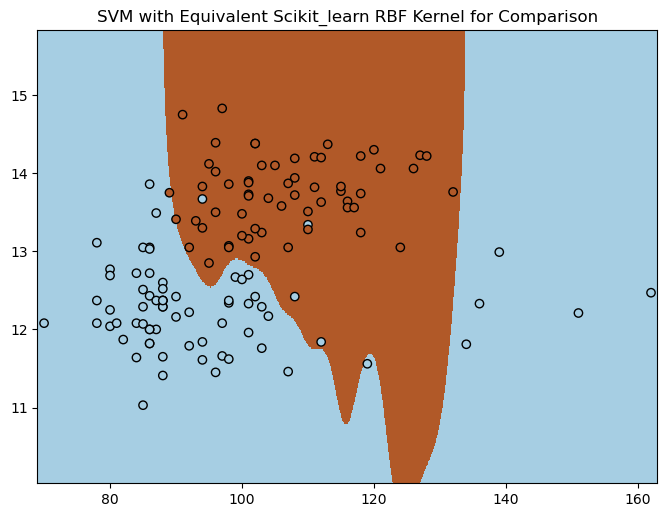

In [249]:
# create an instance of SVM with build in RBF kernel and train it
print("The best parameters are: ", best)
C = best[0]
_gaussSigma = best[1]
equivalentGamma = 1.0 / (2 * _gaussSigma ** 2)
model = svm.SVC(C=C, kernel='rbf', gamma=equivalentGamma)
model.fit(X, Y)

h = .02  # step size in the mesh

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


predictions = model.predict(np.c_[xx.ravel(), yy.ravel()])
predictions = predictions.reshape(xx.shape)

# plot my results
plt.figure(figsize=(8, 6), dpi=100)

plt.pcolormesh(xx, yy, predictions, cmap="Paired")
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap="Paired", edgecolors="black")  # Plot the training points
plt.title('SVM with Equivalent Scikit_learn RBF Kernel for Comparison')
plt.axis('tight')

plt.show()

 Report optimal values and the corresponding estimated accuracy. And explain how you find those optimal values.
 

In [ ]:
'''
Optimal Values: C=.842, gauss_sigma = 2.04, accuracy = .923.
I tried a lot of different values and some of them were more accurate but those models were even more overfitting.
This was the best combination of accuracy and overfitting I could get. My issue has been that such a minor change
Can cause such a massive difference. That and the fact that the program isn't deterministic made training difficult.
'''

# <font color='red'>Problem 4</font>


$$
\newcommand{\R}{\mathbb{R}}
\renewcommand{\b}{\mathbf}
\newcommand{\u}{\mathbf{u}}
\newcommand{\v}{\mathbf{v}}
$$


# Movie Recommendations


| user  | Moonlight | The Shape of Water   | Frozen | Moana     |
|-------|-----------|----------------------|--------|-----------| 
|Alice  |   5       |          4           |    1   |           |
|Bob    |           |          5           |        |    2      |
|Carol  |           |                      |        |    5      |
|David  |           |                      |    5   |    5      |
|Eve    |   5       |          4           |        |           |


What movie should I recommend to Bob?
Will Carol like Frozen?

**Goal**: Fill in entries of the "rating matrix"

# Problem Setup

Let's formalize this as a machine learning problem. To make it concrete, let's load some data and see what it looks like.

In [134]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
import scipy.io

# Load train and test data
data = scipy.io.loadmat('movies.mat')

titles = [t[0] for t in data['movieData']['title'][0,0].ravel()]

for x,y in data.items():
    if isinstance(y, (np.ndarray)) and len(y)==1:
        data[x] = np.asscalar(y)
    elif isinstance(y, (np.ndarray)):
        data[x] = y.ravel()

nUsers    = data['nUsers']
nMovies   = data['nMovies']
userData  = data['userData']
movieData = data['movieData']

train_user   = data['train_user']-1   # matlab 1-index correction
train_movie  = data['train_movie']-1  # matlab 1-index correction
train_rating = data['train_rating']

valid_user   = data['valid_user']-1   # matlab 1-index correction
valid_movie  = data['valid_movie']-1  # matlab 1-index correction
valid_rating = data['valid_rating']

test_user    = data['test_user']-1    # matlab 1-index correction
test_movie   = data['test_movie']-1   # matlab 1-index correction


# Create a pandas data frame for training data to facilitate
# visualization and inspection

train_title = [titles[i] for i in train_movie]

train_data = pd.DataFrame(data = {'user_id' : train_user, 
                                  'movie_id' : train_movie,
                                  'rating' : train_rating,
                                  'title': train_title}, 
                         columns = ['user_id', 'movie_id', 'rating', 'title'])

# subsample to 5000 rows to more easily see a small sampling of ratings for each user
train_data = train_data[:5000]

# sort by user
train_data = train_data.sort_values(by=['user_id', 'rating'])

display(train_data)

/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_5396/3374360984.py:15: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  data[x] = np.asscalar(y)


,user_id,movie_id,rating,title
2070,0,242,1,Jungle2Jungle (1997)
2175,0,73,1,Faster Pussycat! Kill! Kill! (1965)
984,0,101,2,"Aristocats, The (1970)"
2400,0,236,2,Jerry Maguire (1996)
4364,0,179,3,Apocalypse Now (1979)
...,...,...,...,...
1373,942,61,3,Stargate (1994)
724,942,150,4,Willy Wonka and the Chocolate Factory (1971)
1883,942,23,4,Rumble in the Bronx (1995)
3403,942,731,4,Dave (1993)


## Training Data
As we can see, the training data presents observed entries of the "ratings" matrix as list of triples $(i_k, j_k, r_k)$ where

* $i_k$ is the user index of $k$th rating
* $j_k$ is the movie index of $k$th rating
* $r_k$ is the value of $k$th rating (1-5)

In our code we will store the entries of the tuples in three separate 1d arrays of the same length, so the $k$th rating is represented by the values ``train_user[k]``, ``train_movie[k]``, and ``train_rating[k]``.

## Problem Formulation

Now, let's formulate the problem mathematically. Suppose there are $m$ users and $n$ movies. 
Let $R$ be the $m \times n$ "rating" matrix, where $R_{ij}$ is the (possibly unknown) rating for user $i$ on movie $j$. 

Our training data gives us some of the entries of the rating matrix. Our goal
is to learn a parametric model to predict entries that we don't observe.

#### But Where are the Features?

What sort of predictive model can we use for entries of $R$? 

In past learning problems we had *feature vectors* and we learned *weight vectors* to make predictions (using dot products). 

Now we do not have feature vectors. What should we do?

## Matrix Factorization Model

Our solution is to **learn weight vectors for both users and movies**. 

Let $\u_i \in \R^d$ be the weight vector for user $i$ and $\v_j \in \R^d$ be the weight vector for movie $j$. Then we can predict the rating for user $i$ on movie $j$ as:

$$
H_{ij} =\u_i^T \v_j
$$

Our goal is to learn weight vectors for every user and movie so that $R_{ij} \approx H_{ij}$ for those entries of the rating matrix that we observe.

**Problem statement**: 
Given observed entries of the rating matrix presented as triples $(i_k, j_k, r_k)$ for $k=1, \ldots, n_{\text{train}}$, find weight vectors $\mathbf{u_i}$ for each user $i$ and $\mathbf{v}_j$ for each movie $j$ such that:
$$
r_k \approx \mathbf{u_{i_k}}^T \mathbf{v_{j_k}}, \quad k=1, 2, \ldots, n_{\text{train}}
$$

## Why is This Called Matrix Factorization?

* Place the user weight vectors $\u_i$ into the rows of a matrix
  $U$ and the movie feature vectors $\v_j$ into
  the rows of a matrix $V$

    $$ 
    \newcommand{\line}{-}
    U =
        \begin{bmatrix}
            \line \u_1^T \line \\
            \line \u_2^T \line \\
            \ldots \\
            \line \u_m^T \line \\
        \end{bmatrix} \in \R^{m \times d}
    \qquad
    V =
        \begin{bmatrix}
            \line \v_1^T \line \\
            \line \v_2^T \line \\
            \ldots \\
            \line \v_n^T \line \\
        \end{bmatrix} \in \R^{n \times d}
    $$

* Consider the product $U V^T$:

    $$
    \boxed{
        \begin{array}{c}
            \\
            U \\
            \\
        \end{array}
        }
    \boxed{
        \begin{array}{c}
            \ \ \ V^T \ \ \ 
        \end{array}
        }
    $$
  
* It is easy to check that $(i,j)$ entry of $UV^T$ is equal to $\u_i^T
  \v_j$, which is our prediction for the $(i,j)$ entry of $R$

* In other words, our model is that $R \approx U V^T$ (a **factorization**
  of $R$)

* We choose $U$ and $V$ to get good predictions for those entries of
  $R$ that we can observe. As long as we don't overfit, this gives us
  power to generalize to entries we don't observe
  
* The "hidden dimension" $d$ (the length of each weight vector) is a hyperparameter
  that must be tuned with hold-out data.
  

## Your Job: Solve the Learning Problem 

* Formulate a squared error cost function corresponding to the problem statement above.
* Add regularization for *every* user weight vector $\u_i$ and movie weight vector $\v_j$ to get a regularized cost function
* Write down the partial derivatives of your regularized cost function with
  respect to the entries of $\u_i$ and $\v_j$
* Plug the partial derivatives into stochastic gradient descent (SGD)
  and write down the update rule
* Implement SGD
* Tune parameters (e.g., dimension $d$, regularization parameter) get good performance on the validation set

## Logistics


* Submit predictions on test set 
* Evaluation: root-mean squared error (RMSE) on test set

    $$ \text{RMSE} = \sqrt{\frac{1}{n_{\text{test}}}\sum_{(i,j) \in \text{test set}} (H_{ij} - R_{ij})^2}$$

* Your grade:

| RMSE   |  grade  |
|--------|---------|
|<= 1.0  |  80%    |
|<= 0.97 |  90%    |
|<= 0.95 |   95%   |
|<= 0.94 |  100%   ||



## (Review on your own) Model Extension: Add Biases

To get really great performance, consider this extended model for a predicted rating:

$$
H_{ij} = \mu + a_i + b_j + \u_i^T \v_j
$$

This adds several terms to the prediction for user $i$ on movie $j$:

* $\mu$ is an overall baseline rating. For example, the overall average rating of all users
  on all movies may be $\mu = 3.3$
  
* $a_i$ is a user-specific adjustment or "bias". For example, perhaps Alice
  really loves movies and gives them all high ratings. Then, her bias 
  might be $a_i = +0.4$. But Bob is hard to please, so his bias is $a_i = -0.7$.
  
* $b_j$ is a movie-specific bias. For example, perhaps Inside Out is universally
  loved, so its bias is $b_j = +0.7$. A really bad movie would have a negative bias.

The set of parameters of this model includes:

* $\mu$ 
* $a_i$, $i=1,\ldots, m$
* $b_j$, $j=1,\ldots, n$
* $\u_i \in \R^d$, $i=1,\ldots, m$
* $\v_j \in \R^d$, $j=1,\ldots, n$

To learn these parameters, derive partial derivatives of the regularized
cost function with respect to *all* of the above parameters, and update
them all within your stochastic gradient descent loop.

## Further Reading
[Matrix Factorization Techniques for Recommender
Systems](https://datajobs.com/data-science-repo/Recommender-Systems-[Netflix].pdf)
by Yehuda Koren, Robert Bell and Chris Volinsky

* Authors were on the winning team of Netflix prize

* Paper includes algorithms---but beware different notation

## Step 0: Familiarize Yourself With Variables

Here are the variables we populated while loading the data above --- make sure you run that cell first.

In [ ]:
# 1) Metadata
#     
#     nUsers     # of users
#     nMovies    # of movies
#     titles     list of movie titles
#
#
# 2) Training data (60K ratings). This consists of three 1d arrays, 
#    each of length 60K:
#
#      train_user, train_movie, train_rating
#
#    The entries specify the ratings:
#   
#      train_user[k]    user index  of kth rating
#      train_movie[k]   movie index of kth rating
#      train_rating[k]  value (1-5) of kth rating
#
# 2) Validation data (20K ratings). Three vectors of length 20K:
#
#      valid_user, valid_movie, valid_rating
#   
#    Use this to evaluate your model and tune parameters.
#    
# 3) Test set (20K user-movie pairs without ratings):
#
#      test_user, test_movie
#
#    You will create predictions for these pairs and submit them for 
#    grading.

## Step 1: Look at the Prediction Method

To make things concrete, first take a look at the prediction method below. This is just a stub for now that returns the same value ``mu`` for every prediction. Later you will update this to make predictions given the weight vectors and biases.

In [179]:
def rmse(h, r):
    resid = h - r
    cost = np.sqrt(np.mean(resid**2))
    return cost

def predict(mu, a, b, user, movie):
    '''
    PREDICT Make predictions for user/movie pairs
    Inputs: 
      model parameters
      mu                 average user rating across all movies
      a                  vector of user bias
      b                  vector of movie bias 
      user               vector of users
      movie              vector of movies
    
    Output:
      predictions        vector of predictions
    '''    
    
    # This is a stub that predicts the mean rating for all user-movie pairs
    # Replace with your code.

    L = len(user)
    predictions = np.zeros(L)
    #predictions[:] = mu
    for i in range(len(user)):
        unum=user[i]
        mnum=movie[i]
        predictions[i]= mu + a[unum] + b[mnum] + np.dot(np.transpose(U[unum]),V[mnum]) 
    

    return predictions

## Step 2: Learning and Validation

Write code here to do the learning and validation. Stubs are provided. Make sure you derive the partial derivatives on paper before you try to code them. 

In [255]:
############################################
# Tunable parameters (you will add more)
############################################

nDims = 10
reg_user=.35
reg_movie=.35

############################################
# Initialize parameters
############################################

mu = np.mean(train_rating)
a  = np.zeros(nUsers)
b  = np.zeros(nMovies)
U  = np.random.randn(nUsers, nDims)  *.01 # User weights
V  = np.random.randn(nMovies, nDims) *.01 # Movie features

############################################
# Training and validation
############################################

# TODO: write code to train model and evaluate performance on validation set
#

step=.002
iters=1000000

for i in range (iters):
    c =np.random.choice(len(train_rating))
    unum= train_user[c]
    mnum=train_movie[c]
    gradient_user=-2*(train_rating[c]-mu-a[unum]-b[mnum]-np.dot(np.transpose(U[unum]),V[mnum]))*V[mnum]+reg_user*U[unum]
    gradient_movie=-2*(train_rating[c]-mu-a[unum]-b[mnum]-np.dot(np.transpose(U[unum]),V[mnum]))*U[unum]+reg_movie*V[mnum]
    gradient_a= -2*(train_rating[c]-mu-a[unum]-b[mnum]-np.dot(np.transpose(U[unum]),V[mnum]))
    gradient_b= -2*(train_rating[c]-mu-a[unum]-b[mnum]-np.dot(np.transpose(U[unum]),V[mnum]))
    U[unum]=U[unum]-step*gradient_user
    V[mnum]=V[mnum]-step*gradient_movie
    a[unum]=a[unum]-step*gradient_a
    b[mnum]=b[mnum]-step*gradient_b
    

#  predict() is a stub that predicts the overall mean for all user-movie
#  pairs. Update it to take more parameters and make real predictions.

train_predictions = predict(mu,a,b, train_user, train_movie)
print(train_predictions)
print(train_rating)
valid_predictions = predict(mu,a,b, valid_user, valid_movie)

train_rmse = rmse(train_predictions, train_rating)
valid_rmse = rmse(valid_predictions, valid_rating)

print('train_rmse=%.3f, valid_rmse=%.3f' % (train_rmse, valid_rmse))

############################################
# Testing
############################################

# Make and save predictions for test set
test_predictions = predict(mu,a,b, test_user, test_movie)
np.savetxt('test_predictions.txt', test_predictions)


[3.29001366 3.53275998 2.39937539 ... 4.30516276 4.3361254  3.47827177]
[4 4 3 ... 5 1 3]
train_rmse=0.921, valid_rmse=0.942


## Bonus Material: Inspect Predictions for Different Users

After you have learned a good model, you may wish to interpret what it has learned. We can do this by looking at the most positive and most negative predictions for different users
(or the movies that are bumped up or down from the baseline the most).

Read and run the code below to see if you can understand the predictions. (Note: the predictions won't make sense until you have learned a good model!)

In [235]:
all_movies = range(nMovies)

def get_lowest(vals):
    most_negative = np.argsort(vals)
    return most_negative

def get_highest(vals):
    most_negative = np.argsort(vals)
    most_positive = most_negative[::-1]
    return most_positive

k = 8
all_users = range(nUsers)
users_to_examine = all_users[0:5]

for user in users_to_examine:

    # Changes from baseline movie predictions for this user
    delta = np.dot(V, U[user,:])  

    print('*** User %d ***' % (user))
    print('  Top movies')
    for i in get_highest(delta)[0:k]:
        print('    %+.4f  %s' % (delta[i], titles[i]))
    print('')
    
    print('  Bottom movies')
    for i in get_lowest(delta)[0:k]:
        print('    %+.4f  %s' % (delta[i], titles[i]))
    print('')


*** User 0 ***
  Top movies
    +0.0003  Addiction, The (1995)
    +0.0003  Excess Baggage (1997)
    +0.0003  Faster Pussycat! Kill! Kill! (1965)
    +0.0003  Wend Kuuni (God's Gift) (1982)
    +0.0003  Broken English (1996)
    +0.0003  So Dear to My Heart (1949)
    +0.0003  They Made Me a Criminal (1939)
    +0.0002  Far From Home: The Adventures of Yellow Dog (1995)

  Bottom movies
    -0.0003  Exit to Eden (1994)
    -0.0003  Hurricane Streets (1998)
    -0.0003  Albino Alligator (1996)
    -0.0003  Forbidden Christ, The (Cristo proibito, Il) (1950)
    -0.0003  Richie Rich (1994)
    -0.0002  Panther (1995)
    -0.0002  Awfully Big Adventure, An (1995)
    -0.0002  Low Life, The (1994)

*** User 1 ***
  Top movies
    +0.0007  Low Life, The (1994)
    +0.0005  Little Rascals, The (1994)
    +0.0005  True Crime (1995)
    +0.0005  Good Morning (1971)
    +0.0005  Guilty as Sin (1993)
    +0.0005  Nelly & Monsieur Arnaud (1995)
    +0.0005  Falling in Love Again (1980)
    +0.000

## More Bonus Material: Interpretation of Weight Vectors as Features

* So far we have described both $\u_i$ and $\v_j$ as *weight vectors* (since we don't have any features of movies and users). But, it is possible to interpret one or both of these vectors as **learned features**. 

* For example, the first learned feature may discover a preference for comedy vs. drama. In this case:
    * The user feature value $u_{i1}$ should be high if the user likes comedies and low if the user likes dramas better.
    * The movie feature value $v_{j1}$ should be high if the movie is a comedy and low if it is a drama. 
    
* Similarly, feature 2 might describe whether a movie is geared toward kids or adults

* In practice, the feature interpretations often find recognizable patterns but are not quite so clean to describe as the two examples above.

Run the code below to examine the movies with the highest and lowest feature values for some of the features in your learned model.

In [236]:
k = 5

features_to_examine = np.arange(0,10)

for feature in features_to_examine:

    feature_vals = V[:,feature]
    
    print ('*** Feature %d ***' % (feature))
    print ('  Movies with highest feature value')
    for i in get_highest(feature_vals)[0:k]:
        print ('    %+.4f  %s' % (feature_vals[i], titles[i]))
    print ('')
    
    print ('  Movies with lowest feature value')
    for i in get_lowest(feature_vals)[0:k]:
        print ('    %+.4f  %s' % (feature_vals[i], titles[i]))
    print ('')


*** Feature 0 ***
  Movies with highest feature value
    +0.0264  Big Bang Theory, The (1994)
    +0.0260  Paths of Glory (1957)
    +0.0250  Angel and the Badman (1947)
    +0.0233  Hugo Pool (1997)
    +0.0231  Amityville: A New Generation (1993)

  Movies with lowest feature value
    -0.0325  National Lampoon's Senior Trip (1995)
    -0.0285  Safe (1995)
    -0.0276  Hear My Song (1991)
    -0.0257  Baton Rouge (1988)
    -0.0256  Turbulence (1997)

*** Feature 1 ***
  Movies with highest feature value
    +0.0311  Farewell to Arms, A (1932)
    +0.0257  Whole Wide World, The (1996)
    +0.0237  Turbulence (1997)
    +0.0237  Price Above Rubies, A (1998)
    +0.0226  Death and the Maiden (1994)

  Movies with lowest feature value
    -0.0273  Love Affair (1994)
    -0.0270  Moonlight and Valentino (1995)
    -0.0258  Reluctant Debutante, The (1958)
    -0.0247  Flesh and Bone (1993)
    -0.0241  Glass Shield, The (1994)

*** Feature 2 ***
  Movies with highest feature value
    +0